# Your Results of Comparing Query Performance?


I meassured with the data as described in the exercise and with a VM configuration like:


```ruby
  config.vm.provider "virtualbox" do |vb|
    vb.memory = "8192"
    vb.cpus = "2"
    vb.name = "dbdev"
  end
```

and the following two parameters set in `/etc/neo4j/neo4j.conf`

```
dbms.memory.heap.initial_size=4096m
dbms.memory.heap.max_size=7168m
```

If you give Neo4j less RAM then you do not really measure the actual query time.


The times below were measured for the following queries starting from twenty random nodes:


```python
names = ['Kirk Layell', 'Jaime Collum', 'Dinorah Newborn', 'Tana Leston', 
         'Garry Bairo', 'Bradley Sidener', 'Mirna Kaelker',
         'Houston Delilli', 'Tresa Parrigan', 'Barton Jepson',
         'Clemente Kuta', 'Shirley Tricoche', 'Hanna Bacone',
         'Maybell Ramo', 'Randell Wienecke', 'Theron Esche',
         'Colton Kerne', 'Nigel Bayly', 'Norberto Dudak', 'Odell Seki']
```

```python
q1_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES]->(m) RETURN DISTINCT count(m) AS count'
q2_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*2]->(m) RETURN DISTINCT count(m) AS count'
q3_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*3]->(m) RETURN DISTINCT count(m) AS count'
q4_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*4]->(m) RETURN DISTINCT count(m) AS count'
q5_schema = r'MATCH (:Person {name: "%s"})-[:ENDORSES*5]->(m) RETURN DISTINCT count(m) AS count'
```

```python
q1_schema = """SELECT COUNT(DISTINCT ue1.user_2)
FROM oioioi.t_user_endorses ue1
WHERE ue1.user_1 = %s;"""
q2_schema = """SELECT COUNT(DISTINCT ue2.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
WHERE ue1.user_1 = %s;"""
q2_schema = """SELECT COUNT(DISTINCT ue2.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
WHERE ue1.user_1 = %s;"""
q3_schema = """SELECT COUNT(DISTINCT ue3.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
INNER JOIN oioioi.t_user_endorses ue3 ON ue2.user_2 = ue3.user_1
WHERE ue1.user_1 = %s;"""
q4_schema = """SELECT COUNT(DISTINCT ue4.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
INNER JOIN oioioi.t_user_endorses ue3 ON ue2.user_2 = ue3.user_1
INNER JOIN oioioi.t_user_endorses ue4 ON ue3.user_2 = ue4.user_1
WHERE ue1.user_1 = %s;"""
q5_schema = """SELECT COUNT(DISTINCT ue5.user_2)
FROM oioioi.t_user_endorses ue1
INNER JOIN oioioi.t_user_endorses ue2 ON ue1.user_2 = ue2.user_1
INNER JOIN oioioi.t_user_endorses ue3 ON ue2.user_2 = ue3.user_1
INNER JOIN oioioi.t_user_endorses ue4 ON ue3.user_2 = ue4.user_1
INNER JOIN oioioi.t_user_endorses ue5 ON ue4.user_2 = ue5.user_1
WHERE ue1.user_1 = %s;"""
```

In [51]:
%matplotlib inline 

import matplotlib
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


sql_8gb = np.array([[0.84912109375,0.52587890625,0.541015625,0.806884765625,0.695068359375,0.697998046875,0.625244140625,0.572998046875,0.6240234375,0.52294921875,0.64990234375,0.447998046875,0.478759765625,0.427001953125,0.444091796875,0.381103515625,0.7470703125,0.574951171875,0.531005859375,0.542236328125],
                    [1.537109375,0.9638671875,0.86328125,4.4951171875,1.329345703125,0.85693359375,1.307861328125,3.89501953125,3.26806640625,0.473876953125,1.23193359375,0.7509765625,2.803955078125,0.59521484375,1.3330078125,0.548095703125,3.005126953125,7.281982421875,0.8330078125,3.02099609375],
                    [15.179931640625,8.778076171875,7.329833984375,141.302978515625,24.011962890625,23.491943359375,26.81689453125,201.469970703125,172.676025390625,0.5869140625,40.88671875,16.2607421875,73.474365234375,6.7822265625,31.292724609375,4.625244140625,192.702880859375,253.125244140625,12.248046875,60.995849609375],
                    [342.85498046875,352.892822265625,295.615234375,3498.69482421875,541.69384765625,466.489013671875,407.30908203125,3862.68212890625,3798.88330078125,0.69091796875,915.155029296875,259.43701171875,1843.89111328125,161.962890625,975.741943359375,104.298095703125,3861.6220703125,6921.287109375,306.0419921875,1598.081787109375],
                    [9180.5146484375,9522.466796875,9692.98291015625,97297.31811523438,15163.410888671875,14251.27783203125,11194.610107421875,105916.119140625,115848.55908203125,0.982177734375,28754.836181640625,8975.184326171875,57317.031005859375,6172.794189453125,30151.31982421875,3237.214111328125,113300.02392578125,181191.46484375,8200.966064453125,43609.33203125]])

cypher_8gb = np.array([[3.703857421875,2.35400390625,7.94189453125,1.462890625,2.5400390625,1.3388671875,2.166015625,2.5810546875,1.4208984375,1.623046875,1.47900390625,2.6328125,1.4541015625,1.322998046875,1.248779296875,1.5361328125,2.02978515625,1.492919921875,1.89208984375,2.195068359375],
                       [4.01611328125,1.699951171875,1.630859375,4.136962890625,1.747314453125,1.922119140625,1.47021484375,2.587890625,2.25390625,2.430908203125,3.8642578125,1.7080078125,1.99609375,1.430908203125,2.676025390625,1.528076171875,2.14599609375,5.02685546875,3.2919921875,3.30322265625],
                       [3.859130859375,3.614990234375,2.943115234375,21.642822265625,3.94580078125,3.970947265625,4.030029296875,23.97802734375,24.184814453125,1.477783203125,9.349853515625,3.162109375,11.539794921875,2.93212890625,6.56298828125,2.156005859375,25.073974609375,41.512939453125,8.419921875,16.580078125],
                       [56.025146484375,59.939208984375,41.83203125,434.148193359375,72.237060546875,73.783935546875,55.8642578125,477.25,520.0908203125,2.89697265625,132.690185546875,41.0048828125,292.85595703125,33.06201171875,144.742919921875,16.89501953125,498.556884765625,808.117919921875,44.55224609375,197.862060546875],
                       [1009.81884765625,1009.36572265625,980.078857421875,9687.740966796875,1568.075927734375,1485.94775390625,1131.094970703125,10718.056884765625,11303.607177734375,2.44091796875,2786.1611328125,932.58984375,5793.34423828125,635.780029296875,3015.93798828125,338.64599609375,11403.488037109375,18386.447021484375,859.84814453125,4438.5361328125]])

tbl_label = ['one', 'two', 'three', 'four', 'five']
sql_stats = [(np.mean(el), np.median(el)) for el in sql_8gb]
cypher_stats = [(np.mean(el), np.median(el)) for el in cypher_8gb]
cypher_sql_ratio = [n / s for (s, _), (n, _) in zip(sql_stats, cypher_stats)]

sql_avg_t = [t for t, _ in sql_stats]
cypher_avg_t = [t for t, _ in cypher_stats]

In [52]:
# Run this one to generate the following table
print('||MySQL Average| MySQL Median| Neo4j Average| Neo4j Median|Cypher/SQL Avg. Ratio')
print('|------|:------:|:-----:|:------:|:------:|:------:|')
for line in zip(tbl_label, sql_stats, cypher_stats, cypher_sql_ratio):
    l, (s_a, s_m), (n_a, n_m), r = line
    print('|Depth %s:| %.3f | %.3f | %.3f | %.3f | %.3f |' % (l, s_a, s_m, n_a, n_m, r))

||MySQL Average| MySQL Median| Neo4j Average| Neo4j Median|Cypher/SQL Avg. Ratio
|------|:------:|:-----:|:------:|:------:|:------:|
|Depth one:| 0.584 | 0.558 | 2.221 | 1.758 | 3.801 |
|Depth two:| 2.020 | 1.319 | 2.543 | 2.200 | 1.259 |
|Depth three:| 65.702 | 25.414 | 11.047 | 5.297 | 0.168 |
|Depth four:| 1525.766 | 504.091 | 200.220 | 73.010 | 0.131 |
|Depth five:| 43448.920 | 14707.344 | 4374.350 | 1527.012 | 0.101 |


||MySQL Average| MySQL Median| Neo4j Average| Neo4j Median|Cypher/SQL Avg. Ratio
|------|:------:|:-----:|:------:|:------:|:------:|
|Depth one:| 0.584 | 0.558 | 2.221 | 1.758 | 3.801 |
|Depth two:| 2.020 | 1.319 | 2.543 | 2.200 | 1.259 |
|Depth three:| 65.702 | 25.414 | 11.047 | 5.297 | 0.168 |
|Depth four:| 1525.766 | 504.091 | 200.220 | 73.010 | 0.131 |
|Depth five:| 43448.920 | 14707.344 | 4374.350 | 1527.012 | 0.101 |

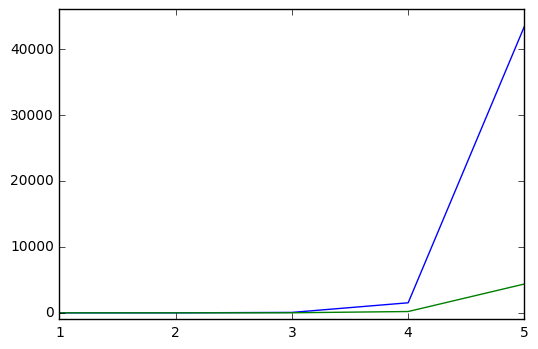

In [50]:
plt.cla()
plt.plot(range(1, len(sql_avg_t) + 1), sql_avg_t)
plt.plot(range(1, len(sql_avg_t) + 1), cypher_avg_t)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.axis([1, 5, -1000, 46000])
plt.xticks(range(1, len(sql_avg_t) + 1), range(1, len(sql_avg_t) + 1))
plt.show()

# Advanced Neo4j Concepts


The following is based on http://neo4j.com/graphgist/6619085 and https://maxdemarzi.com/2015/08/26/modeling-airline-flights-in-neo4j/ and in particular on `:play http://guides.neo4j.com/modeling_airports`.

The original data is extrtacted from https://www.transtats.bts.gov/databases.asp?Mode_ID=1&Mode_Desc=Aviation&Subject_ID2=0



## Recap on Modelling in Neo4j



When modeling data it is useful to have a use case of a system's application in mind. For example, we could start with the following question:

> As an air travel enthusiast
>
> I want to know how airports are connected
>
> So that I can find the busiest ones


Consequently, we could create the following model:

![initial_model](http://guides.neo4j.com/modeling_airports/img/initial.png)



### Manually creating the model

Before we start working with a large dataset let’s create some nodes and relationships manually. First we’ll create some airports:

```cypher
CREATE (:Airport {code: "LAX"})  // Los Angeles International Airport
CREATE (:Airport {code: "LAS"})  // McCarran International Airport, Las Vegas
CREATE (:Airport {code: "ABQ"})  // Albuquerque International Sunport Airport
```

We can find `LAX` by changing the `CREATE` to a `MATCH` and returning the matched node:

```cypher
MATCH (lax:Airport {code: "LAX"})
RETURN lax
```

https://www.world-airport-codes.com/



### Create relationships

Now let’s create some connections between those airports.

```cypher
MATCH (las:Airport {code: "LAS"})
MATCH (lax:Airport {code: "LAX"})
CREATE (las)-[connection:CONNECTED_TO {
  airline: "WN",
  flightNumber: "82",
  date: "2008-1-3",
  departure: 1715,
  arrival: 1820}]->(lax)
```

We can check that the relationship was created correctly by executing the following query:

```cypher
MATCH connection = (las:Airport {code: "LAS"})-[:CONNECTED_TO]->(lax:Airport {code: "LAX"})
RETURN connection
```


### Create Relationships Idempotently

Idempotently, what is that? 

> *idempotent* ... denoting an element of a set which is unchanged in value when multiplied or otherwise operated on by itself.

When using the `MERGE` command, we only need to inline the properties that make the `CONNECTED_TO` relationship unique. In this case it is the combination of airline, flightNumber, and date. To idempotently create a specific connection between airports we can run the following query:

```cypher
MATCH (las:Airport {code: "LAS"})
MATCH (lax:Airport {code: "LAX"})
MERGE (las)-[connection:CONNECTED_TO { airline: "WN", flightNumber: "82", date: "2008-1-3"}]->(lax)
ON CREATE SET connection.departure = 1715, connection.arrival = 1820
```

Let’s try it with another connection to get the hang of it:

```cypher
MATCH (las:Airport {code: "LAS"})
MATCH (lax:Airport {code: "ABQ"})
MERGE (las)-[connection:CONNECTED_TO { airline: "WN", flightNumber: "500", date: "2008-1-3"}]->(lax)
ON CREATE SET connection.departure = 1445, connection.arrival = 1710
```

Try running the query multiple times. The relationship will only be created once.


### Find All the Connections leaving an Airport

We can now find any connections leaving LAS:

```cypher
MATCH connection = (las:Airport {code: "LAS"})-[:CONNECTED_TO]->(:Airport)
RETURN connection
```


### Exploring data with LOAD CSV

While we are working out the appropriate model for our dataset it is much easier to work with a subset of the data so that we can iterate quickly. A smaller dataset containing the first 10,000 connections lives in `flights_initial.csv`, s https://github.com/neo4j-contrib/training/tree/master/modeling/data.

We can run the following query to see what data we’ve got to work with:

```cypher
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/neo4j-contrib/training/master/modeling/data/flights_initial.csv" AS row
RETURN row
LIMIT 5
```


This query:

  * loads the file flights_initial.csv
  * iterates over the file, referring to each line as the variable row
  * and returns the first 5 lines in the file

We have got lots of different fields but the ones that will be helpful for answering our question are: `Origin`, `Dest`, and `FlightNum`.



Importing connections and airports

Run the following query to create nodes and relationships for these connections:

```cypher
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/neo4j-contrib/training/master/modeling/data/flights_initial.csv" AS row
MERGE (origin:Airport {code: row.Origin})
MERGE (destination:Airport {code: row.Dest})
MERGE (origin)-[connection:CONNECTED_TO {
  airline: row.UniqueCarrier,
  flightNumber: row.FlightNum,
  date: toInteger(row.Year) + "-" + toInteger(row.Month) + "-" + toInteger(row.DayofMonth)}]->(destination)
ON CREATE SET connection.departure = toInteger(row.CRSDepTime), connection.arrival = toInteger(row.CRSArrTime)
```
This query:

  * iterates through each row in the file
  * creates nodes with the Airport label for the origin and destination airports if they don’t already exist
  * creates a connection relationship between origin and destination airports for each row in the file

By default properties will be stored as strings. We know that year, month, and day are actually numeric values so we will coerce them using the toInteger function.

Now we are ready to start querying the data.

  
### Finding the most popular airports

We can see some of what we have imported by writing the following query, which finds the airports with the most outgoing connections.

```cypher
MATCH (a:Airport)-[:CONNECTED_TO]->()
RETURN a, COUNT(*) AS outgoing
ORDER BY outgoing DESC
LIMIT 10
```

This query:

  * finds every node with the `Airport` label
  * finds all outgoing `CONNECTED_TO` relationships
  * counts them up grouped by airport
  * returns the `Airport` nodes and the `outgoing` count in descending order by `outgoing`
  * limits the number of airports returned to `10`
  

# Exercise: Finding connections

Now it is your turn! Try and write queries to answer the following questions:

  * Find the airports that have the most incoming connections
  * Find all the connections into Las Vegas (LAS)
  * Find all the connections from Las Vegas (LAS) to Los Angeles (LAX)

**Hint:** Refer to the Cypher refcard (http://neo4j.com/docs/stable/cypher-refcard/) for Cypher Syntax.



## Refactoring and Profiling


### Finding specific connections


The model has worked well so far. We have been able to find the popular airports and find the connections between pairs of airports without much trouble.

What about if we want to find all the occurrences of a specific connection?

> As an air travel enthusiast
>
> I want to know the schedule for flight number
>
> So that I know when I will be able to spot those planes taking off and landing


Our next query finds all the instances of connection `WN 1016`:

```cypher
MATCH  (origin:Airport)-[connection:CONNECTED_TO]->(destination:Airport)
WHERE connection.airline = "WN" AND connection.flightNumber = "1016"
RETURN origin.code, destination.code, connection.date, connection.departure, connection.arrival
```

It is still reasonably quick because we only have 10,000 rows, but under the covers we’re actually doing a lot of unnecessary work.


We can *profile* our query by prefixing it with the `PROFILE` keyword:

> `PROFILE`
If you want to run the statement and see which operators are doing most of the work, use PROFILE. This will run your statement and keep track of how many rows pass through each operator, and how much each operator needs to interact with the storage layer to retrieve the necessary data. Please note that profiling your query uses more resources, so you should not profile unless you are actively working on a query. https://neo4j.com/docs/developer-manual/current/cypher/query-tuning/how-do-i-profile-a-query/


```cypher
PROFILE
MATCH  (origin:Airport)-[connection:CONNECTED_TO]->(destination:Airport)
WHERE connection.airline = "WN" AND connection.flightNumber = "1016"
RETURN origin.code, destination.code, connection.date, connection.departure, connection.arrival
```

What we get back is an execution plan which describes the Cypher operators used to execute this query. You can read more about these in the developer manual (https://neo4j.com/docs/developer-manual/current/cypher/#execution-plans)

In this one the query starts with a `NodeByLabelScan` on the `:Airport` label, which means that we first scanned all the airports. Next we followed the `FLIGHT` relationship to `origin` airports, and we can see from the estimated rows count that we followed 10,000 of these.

In fact we actually looked at every single flight, which we can confirm by executing the following query:

```cypher
MATCH ()-[:CONNECTED_TO]->()
RETURN COUNT(*)
```

So it is clear that our model is not optimal - we are doing far too much work just to find the destinations and origins of one flight.

It is time to **refactor** the model.


:play http://guides.neo4j.com/modeling_airports/02_flight.html


### Ensuring flight uniqueness

When we refactor the model we want to make sure we only create each flight once.

Neo4j allows us to create unique constraints to ensure uniqueness across a label/property pair, but at the moment we can only create constraints on single properties. We want to ensure uniqueness across several properties so we will combine those together into a single dummy property.

The combination of airline, flight number, and date makes a flight unique. As we saw in the previous section, however, some flights can have multiple legs so we will need to consider departure and arrival airports as well. We will create a flightId with this format: `{airline}{flightNumber}{year}-{month}-{day}_{origin}_{destination}`

Run the following query to create a unique constraint on the Flight/id label/property pair:

```cypher
CREATE CONSTRAINT ON (f:Flight)
ASSERT f.id IS UNIQUE
```

Ok, now let the refactoring begin.



### Refactoring - Creating flights

We are now ready to introduce `Flight` nodes to our data model. That is, we want to create a data model of the following kind:


![refactored_model](http://guides.neo4j.com/modeling_airports/img/flight_first_class.png)

Run the following query to create Flight nodes for every CONNECTED_TO relationship:

```cypher
MATCH (origin:Airport)-[connection:CONNECTED_TO]->(destination:Airport)
MERGE (newFlight:Flight { id: connection.airline + connection.flightNumber + "_" + connection.date +  "_" + origin.code + "_" + destination.code }   )
ON CREATE SET newFlight.date = connection.date,
              newFlight.airline = connection.airline,
              newFlight.number = connection.flightNumber,
              newFlight.departure = connection.departure,
              newFlight.arrival = connection.arrival
MERGE (origin)<-[:ORIGIN]-(newFlight)
MERGE (newFlight)-[:DESTINATION]->(destination)
```

This query:

  * finds all `(origin, connection, destination)` paths
  * creates a `Flight` node if one doesn’t already exist
  * creates an `ORIGIN` relationship to the origin airport and a `DESTINATION` relationship to the destination airport

### Find all the flights for flight number WN 1016

First let’s create an index on `(Flight, number)` so that we can quickly find the appropriate flights.

```cypher
CREATE INDEX ON :Flight(number)
```

Now we are ready to find those flights!

```cypher
MATCH (origin)<-[:ORIGIN]-(flight:Flight)-[:DESTINATION]->(destination)
WHERE flight.airline = "WN" AND flight.number = "1016"
RETURN origin, destination, flight
```

Before we delete the CONNECTED_TO relationship we should profile the two versions of the query to see whether our refactoring has improved things.




# Exercise: Profiling the two flight models

Run the following query to profile the new version of the query to see if we have improved things:

```cypher
PROFILE
MATCH (origin)<-[:ORIGIN]-(flight:Flight)-[:DESTINATION]->(destination)
WHERE flight.airline = "WN" AND flight.number = "1016"
RETURN origin, destination, flight
```

For reference, you can re-run the profile on our other query as well:

```cypher
PROFILE
MATCH (origin:Airport)-[flight:CONNECTED_TO]->(destination:Airport)
WHERE flight.airline = "WN" AND flight.flightNumber = "1016"
RETURN origin, destination, flight
```

What do you notice?
  
  
  
  
# Refactoring Edges

`:play http://guides.neo4j.com/modeling_airports/03_flight_booking.html`


### Flight booking

Our system develops and we got a new requirement to satisfy:

> As a frequent traveller
> 
> I want to find flights from `origin` to `destination` on `date`
> 
> So that I can book my business flight

Before we write queries to satisfy this requirement, let’s import some more data.



### Import more flights

We initially loaded 10000 flights. That was a fun initial dataset to play with, but now that we have got a model we are happy with let’s load in a bit more data.

`flights_50k.csv` contains 50000 flights. We can run the following query to import those flights:

```cypher
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/neo4j-contrib/training/master/modeling/data/flights_50k.csv" AS row
MERGE (origin:Airport {code: row.Origin})
MERGE (destination:Airport {code: row.Dest})
MERGE (newFlight:Flight { id: row.UniqueCarrier + row.FlightNum + "_" + row.Year + "-" + row.Month + "-" + row.DayofMonth + "_" + row.Origin + "_" + row.Dest }   )
ON CREATE SET newFlight.date = toInteger(row.Year) + "-" + toInteger(row.Month) + "-" + toInteger(row.DayofMonth),
              newFlight.airline = row.UniqueCarrier,
              newFlight.number = row.FlightNum,
              newFlight.departure = toInteger(row.CRSDepTime),
              newFlight.arrival = toInteger(row.CRSArrTime)
MERGE (newFlight)-[:ORIGIN]->(origin)
MERGE (newFlight)-[:DESTINATION]->(destination)
```


Now it is time to write a query to find available flights between two airports on a specific date.

Let’s find all the flights going from Los Angeles (LAS) to Chicago Midway International (MDW) on the 3rd January. Run the following query:

```cypher
MATCH path = (origin:Airport {code: "LAS"})<-[:ORIGIN]-(flight:Flight)-[:DESTINATION]->(destination:Airport {code: "MDW"})
WHERE flight.date = "2008-1-3"
RETURN path
```

This returns quite quickly but try prefixing it with `PROFILE`. 

What do you notice?


### Profiling the finding flights to book query

The query starts by using an index to find `MDW` but then has to traverse all incoming `DESTINATION` relationships and check the date property on the `:Flight` nodes on the other side. The more flights an airport has the more we will have to scan through, and since we are only working with 50000 flights we should probably find a better way to model our data before importing any more rows.

Can you think of a way that we can change our model to avoid doing all these property lookups?


One way that we can tweak our model to be more aligned with our queries is by bundling flights by day.


# Exercise: Introducing Airport Day

We want to introduce `:AirportDay` nodes so that we do not have to scan through all the flights going from an airport when we are only interested in a subset of them.

Try and write a query to evolve our current model to include this new concept.


![](http://guides.neo4j.com/modeling_airports/img/airport_day.png)


`:play http://guides.neo4j.com/modeling_airports/04_specific_relationship_types.html`


  
  
  
# Modelling Guidelines


See the `Modeling Guidelines.pdf`




# Your Turn


Work with the following two tutorials:

`:play http://guides.neo4j.com/modeling_airports/04_specific_relationship_types.html`

`:play http://guides.neo4j.com/modeling_airports/05_refactoring_large_graphs.html`
  
  
  
  



# Spatial Queries

Neo4j with version greater 3.0 supports now functions to specify points in a 2D coordinate system and to calculate the geodesic distance between two points directly. https://neo4j.com/docs/developer-manual/current/cypher/functions/spatial/


Let's get some locations for our airports...

```cypher
LOAD CSV WITH HEADERS FROM "https://raw.githubusercontent.com/neo4j-contrib/training/master/modeling/data/airports.csv" AS row
MATCH (a:Airport {code: row.iata_code})
SET a.latitude = toFloat(row.latitude_deg),
    a.longitude = toFloat(row.longitude_deg)
```


To compute the distance between two points, we have to generate `Point` objects out of the latitude and longitude properties, on which we can call the `distance` function.


```cypher
MATCH (a:Airport)-[CONNECTED_TO]-(b:Airport)
WITH point({ longitude: a.longitude, latitude: a.latitude }) AS aPoint, point({ longitude: b.longitude, latitude: b.latitude }) AS bPoint
RETURN DISTINCT round(distance(aPoint, bPoint)) AS distance
```



```cypher
MATCH (a:Airport)-[CONNECTED_TO]-(b:Airport)
WITH point({ longitude: a.longitude, latitude: a.latitude }) AS aPoint, point({ longitude: b.longitude, latitude: b.latitude }) AS bPoint, a, b
WITH DISTINCT round(distance(aPoint, bPoint)) AS distance, a, b
ORDER BY distance DESC
WHERE distance / 1000 > 1000
RETURN distance, a.code, b.code
```